# Calculations around the format change in 3BLD from Bo3 to Bo5
With the [2026 regulations change](https://www.worldcubeassociation.org/posts/wca-regulations-january-2026), the format of the event 3BLD changed from Best of 3 (Bo3) to Best fo 5 (Bo5). With that the also recognized average-style changed from Mean of 3 (Mo3) to Average of 5 (Ao5), with the key difference that for a Mo3 three successful attempts were needed and for a Ao5 only four successful attempts are needed, as the worst attempt (that may be a DNF or DNS) is not considered for calculating the Ao5. Another format change is the implementation of Dual Rounds, which for 3BLD consist of two Bo5 with two possibilities of achieving an Ao5.

## Getting at least one success
For any given number of attempts $n$, the chance of getting at least one success $P_{1+/n}$ is equivalent to the chance of not getting $n$ unsuccessful attempts. $p$ is the success rate of a competitor (the probability that an attempt is a success) under the assumption, that the probability for each attempt stays the same (no effects of getting tired or doing safety solves). The probability for at least one success out of $n$ attempts is $$P_{1+/n} = 1 - (1-p)^n.$$

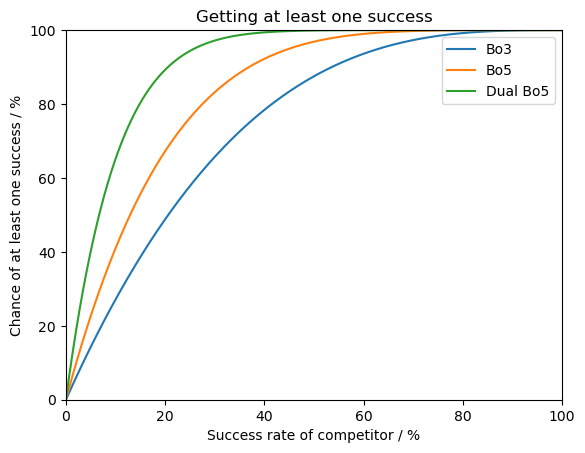

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
x = np.linspace(0,1,1001)
x_axis = np.linspace(0,100,1001)
Bo3_sin = [(1 - ((1 - i) ** 3)) * 100 for i in x]
Bo5_sin = [(1 - ((1 - i) ** 5)) * 100 for i in x]
DualBo5_sin = [(1 - ((1 - i) ** 10)) * 100 for i in x]

fig, ax = plt.subplots()
plt.title('Getting at least one success')
ax.plot(x_axis, Bo3_sin,label='Bo3')
ax.plot(x_axis, Bo5_sin,label='Bo5')
ax.plot(x_axis, DualBo5_sin,label='Dual Bo5')

ax.set_xlabel('Success rate of competitor / %')
ax.set_ylabel('Chance of at least one success / %')
ax.set_xlim(0, 100) 
ax.set_ylim(0, 100)

plt.legend()
plt.show()

As expected the chance of getting at least one successful attempt increases with the number of attempts.

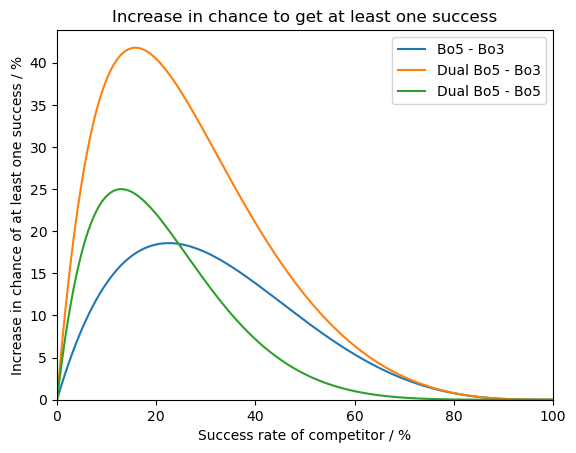

In [ ]:
Delta_Bo5_Bo3_sin = [x-y for x,y in zip(Bo5_sin, Bo3_sin)]
Delta_DualBo5_Bo3_sin = [x-y for x,y in zip(DualBo5_sin, Bo3_sin)]
Delta_DualBo5_Bo5_sin = [x-y for x,y in zip(DualBo5_sin, Bo5_sin)]

fig, ax = plt.subplots()
plt.title('Increase in chance to get at least one success')
ax.plot(x_axis, Delta_Bo5_Bo3_sin,label='Bo5 - Bo3')
ax.plot(x_axis, Delta_DualBo5_Bo3_sin,label='Dual Bo5 - Bo3')
ax.plot(x_axis, Delta_DualBo5_Bo5_sin,label='Dual Bo5 - Bo5')

ax.set_xlabel('Success rate of competitor / %')
ax.set_ylabel('Increase in chance of at least one success / %')
ax.set_xlim(0, 100) 
ax.set_ylim(0)

plt.legend()
plt.show()

In [110]:
advantage_sin = fr'''The Bo5 especially benefits competitors with lower success rates. The chances of getting at least one success increase up to {max(Delta_Bo5_Bo3_sin):.2f} compared to the Bo3. The maximum advantage to achieve at least one success is shown in the following table.
 | Comparison   |      Max. Advantage / %     |  Success rate / % |
|----------|:-------------:|:------:|
| Ao5 vs. Mo3 |  ${max(Delta_Bo5_Bo3_sin):.2f}$ | ${x_axis[Delta_Bo5_Bo3_sin.index(max(Delta_Bo5_Bo3_sin))]:.2f}$ |
| Dual Ao5 vs. Mo3 |    ${max(Delta_DualBo5_Bo3_sin):.2f}$   |  ${x_axis[Delta_DualBo5_Bo3_sin.index(max(Delta_DualBo5_Bo3_sin))]:.2f}$ |
| Dual Ao5 vs. Ao5 | ${max(Delta_DualBo5_Bo5_sin):.2f}$ |  ${x_axis[Delta_DualBo5_Bo5_sin.index(max(Delta_DualBo5_Bo5_sin))]:.2f}$ |'''
display(Markdown(advantage_sin))

The Bo5 especially benefits competitors with lower success rates. The chances of getting at least one success increase up to 18.59 compared to the Bo3. The maximum advantage to achieve at least one success is shown in the following table.
 | Comparison   |      Max. Advantage / %     |  Success rate / % |
|----------|:-------------:|:------:|
| Ao5 vs. Mo3 |  $18.59$ | $22.50$ |
| Dual Ao5 vs. Mo3 |    $41.78$   |  $15.80$ |
| Dual Ao5 vs. Ao5 | $25.00$ |  $12.90$ |

## Getting a Mo3 vs. getting an Ao5
This calculation was presented by Sebastiano Tronto [here](https://github.com/thewca/wca-regulations/issues/571). The probability of getting a Mo3 (3 successful attempts out of 3 attempts) $P_{\mathrm{Mo3}}$ is $$P_{\mathrm{Mo3}} = p^3.$$ The probability of getting an Ao5 $P_{\mathrm{Ao5}}$ is the probability of getting 4 successful attempts and one unsuccessful attempt (in any order) plus the chance of getting 5 successful attempts $$P_{\mathrm{Ao5}} = P_{4/5} + P_{5/5} = 5p^4(1-p) + p^5.$$ By solving the inequation $$P_{\mathrm{Ao5}}\geq P_{\mathrm{Mo3}}$$ it is found that for $p>25\,\%$ the chance of getting an Ao5 is greater than the probability of getting an Mo3. However this calculation leads to the question how big the disadvantage for competitors with $p<25\,\%$ is.

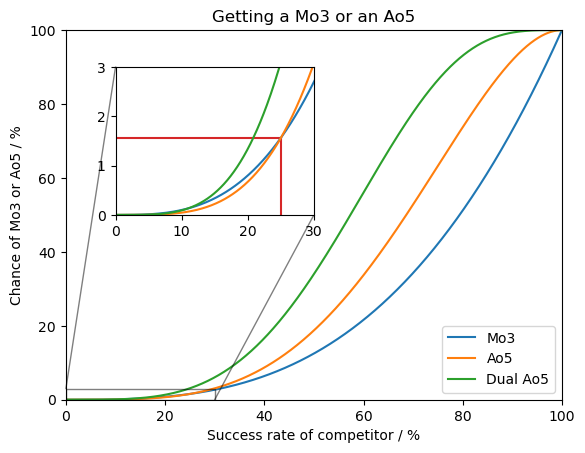

In [74]:

def p_ao5(p):
    return (5 * p **4 * (1 - p) + p**5)
Mo3_avg = [(i ** 3) * 100 for i in x]
Ao5_avg = [p_ao5(i) * 100 for i in x]
DualAo5_avg = [(2*p_ao5(i)*(1-p_ao5(i))+(p_ao5(i)**2)) * 100 for i in x]
fig, ax = plt.subplots()
plt.title('Getting a Mo3 or an Ao5')
ax.plot(x_axis, Mo3_avg,label='Mo3')
ax.plot(x_axis, Ao5_avg,label='Ao5')
ax.plot(x_axis, DualAo5_avg,label='Dual Ao5')
axins=ax.inset_axes([0.1,0.5,0.4,0.4])
axins.plot([25,25],[0,1.5625],color='tab:red')
axins.plot([0,25],[1.56250,1.5625],color='tab:red')
axins.plot(x_axis, Mo3_avg)
axins.plot(x_axis, Ao5_avg)
axins.plot(x_axis, DualAo5_avg)

ax.set_xlabel('Success rate of competitor / %')
ax.set_ylabel('Chance of Mo3 or Ao5 / %')
ax.set_xlim(0, 100) 
ax.set_ylim(0, 100)
axins.set_xlim(0, 30) 
axins.set_ylim(0, 3)
ax.indicate_inset_zoom(axins,edgecolor='black')

plt.legend()
plt.show()


For all success rates over $25\,\%$ the chance of achieving an Ao5 is higher than the chance of achieving an Mo3. For success rates below $25\,\%$ the chance of achieving a Mo3 is higher than the chance of achieving an Ao5 by a very small amount. A Dual Round increases the chances of achieving at least one Ao5 further for all competitors with success rates $>11.0\,\%$.

# Difference between Mo3 and Ao5

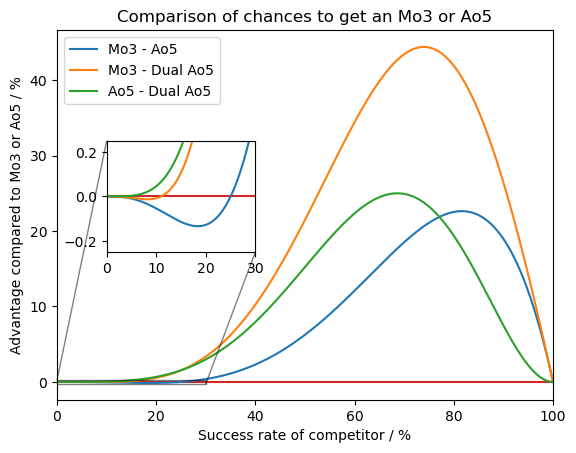

In [77]:

Delta_Ao5_Mo3 = [x-y for x,y in zip(Ao5_avg, Mo3_avg)]
Delta_DualAo5_Mo3 = [x-y for x,y in zip(DualAo5_avg, Mo3_avg)]
Delta_DualAo5_Ao5 = [x-y for x,y in zip(DualAo5_avg, Ao5_avg)]

fig, ax = plt.subplots()
plt.title('Comparison of chances to get an Mo3 or Ao5')
ax.plot([0,100],[0,0],color='tab:red')
ax.plot(x_axis, Delta_Ao5_Mo3,label='Mo3 - Ao5')
ax.plot(x_axis, Delta_DualAo5_Mo3,label='Mo3 - Dual Ao5')
ax.plot(x_axis, Delta_DualAo5_Ao5,label='Ao5 - Dual Ao5')

axins=ax.inset_axes([0.1,0.4,0.3,0.3])
axins.plot([0,100],[0,0],color='tab:red')
axins.plot(x_axis, Delta_Ao5_Mo3)
axins.plot(x_axis, Delta_DualAo5_Mo3)
axins.plot(x_axis, Delta_DualAo5_Ao5)

ax.set_xlabel('Success rate of competitor / %')
ax.set_ylabel('Advantage compared to Mo3 or Ao5 / %')
ax.set_xlim(0, 100) 
axins.set_xlim(0, 30) 
axins.set_ylim(-0.25, 0.25)

ax.indicate_inset_zoom(axins,edgecolor='black')


plt.legend()
plt.show()

In [109]:
advantage = fr'''| Comparison   |      Max. Advantage / %     |  Success rate / % |
|----------|:-------------:|:------:|
| Ao5 vs. Mo3 |  ${max(Delta_Ao5_Mo3):.2f}$ | ${x_axis[Delta_Ao5_Mo3.index(max(Delta_Ao5_Mo3))]:.2f}$ |
| Dual Ao5 vs. Mo3 |    ${max(Delta_DualAo5_Mo3):.2f}$   |  ${x_axis[Delta_DualAo5_Mo3.index(max(Delta_DualAo5_Mo3))]:.2f}$ |
| Dual Ao5 vs. Ao5 | ${max(Delta_DualAo5_Ao5):.2f}$ |  ${x_axis[Delta_DualAo5_Ao5.index(max(Delta_DualAo5_Ao5))]:.2f}$ |'''

disadvantage = fr'''| Comparison   |      Max. Disadvantage / %     |  Success rate / % |
|----------|:-------------:|:------:|
| Ao5 vs. Mo3 |  ${min(Delta_Ao5_Mo3):.2f}$ | ${x_axis[Delta_Ao5_Mo3.index(min(Delta_Ao5_Mo3))]:.2f}$ |
| Dual Ao5 vs. Mo3 |    ${min(Delta_DualAo5_Mo3):.2f}$   |  ${x_axis[Delta_DualAo5_Mo3.index(min(Delta_DualAo5_Mo3))]:.2f}$ |
| Dual Ao5 vs. Ao5 | $-$ |  $-$ |'''

display(Markdown('The maximum increase in change to achieve an average between the different formats is shown in the following table:'))
display(Markdown(advantage))
display(Markdown('The maximum decrease in change to achieve an average between the different formats is shown in the following table. For Dual Rounds compared with just one Bo5 the change to get an average is never decreased.'))
display(Markdown(disadvantage))

The maximum increase in change to achieve an average between the different formats is shown in the following table:

| Comparison   |      Max. Advantage / %     |  Success rate / % |
|----------|:-------------:|:------:|
| Ao5 vs. Mo3 |  $22.63$ | $81.60$ |
| Dual Ao5 vs. Mo3 |    $44.40$   |  $73.90$ |
| Dual Ao5 vs. Ao5 | $25.00$ |  $68.60$ |

The maximum decrease in change to achieve an average between the different formats is shown in the following table. For Dual Rounds compared with just one Bo5 the change to get an average is never decreased.

| Comparison   |      Max. Disadvantage / %     |  Success rate / % |
|----------|:-------------:|:------:|
| Ao5 vs. Mo3 |  $-0.13$ | $18.40$ |
| Dual Ao5 vs. Mo3 |    $-0.01$   |  $8.20$ |
| Dual Ao5 vs. Ao5 | $-$ |  $-$ |